In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H1.csv', dtype=dtypes)
a=train_df.head()
b=train_df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
73,1.0,152.0,2015,July,27,2,4.0,10.0,2.0,0.0,...,No Deposit,243,NULL,0.0,Contract,67.58,0.0,0.0,Canceled,2015-04-03
272,0.0,45.0,2015,July,27,2,2.0,3.0,2.0,0.0,...,No Deposit,8,NULL,0.0,Contract,79.50,0.0,0.0,Check-Out,2015-07-07
303,0.0,1.0,2015,July,27,2,0.0,1.0,2.0,0.0,...,No Deposit,240,NULL,0.0,Transient,147.00,1.0,0.0,Check-Out,2015-07-03
339,0.0,130.0,2015,July,27,4,2.0,6.0,2.0,0.0,...,No Deposit,196,NULL,0.0,Transient,96.95,1.0,1.0,Check-Out,2015-07-12
430,0.0,37.0,2015,July,27,1,1.0,4.0,1.0,0.0,...,No Deposit,241,NULL,0.0,Transient,97.29,0.0,1.0,Check-Out,2015-07-06
529,0.0,98.0,2015,July,27,4,2.0,1.0,2.0,0.0,...,No Deposit,8,NULL,0.0,Transient,71.55,1.0,0.0,Check-Out,2015-07-07
756,0.0,150.0,2015,July,27,2,2.0,4.0,2.0,0.0,...,No Deposit,156,NULL,0.0,Contract,55.68,0.0,0.0,Check-Out,2015-07-08
874,0.0,157.0,2015,July,27,4,4.0,6.0,2.0,0.0,...,No Deposit,156,NULL,0.0,Contract,55.68,0.0,0.0,Check-Out,2015-07-14
1182,0.0,1.0,2015,July,27,1,0.0,1.0,1.0,0.0,...,No Deposit,NULL,270,0.0,Transient,134.00,0.0,0.0,Check-Out,2015-07-02
1279,1.0,26.0,2015,July,27,4,2.0,5.0,2.0,2.0,...,No Deposit,240,NULL,0.0,Transient,163.00,0.0,0.0,Canceled,2015-06-09


In [3]:
data=b.apply(lambda col: pd.factorize(col, sort=True)[0])
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,80,0,5,30,30,2,4,2,0,...,0,43,0,0,2,2722,1,1,1,143
1,0,76,0,11,38,22,2,7,2,0,...,0,141,0,0,0,826,0,0,1,200
2,1,81,2,8,19,16,0,4,2,2,...,0,43,0,0,2,2044,0,2,0,757
3,0,37,1,7,12,23,1,3,1,0,...,0,44,0,0,2,697,0,2,1,378
4,0,57,2,4,2,16,2,5,2,0,...,0,43,0,0,2,281,0,1,1,680
5,1,187,1,5,31,30,2,5,2,0,...,0,74,0,0,2,2457,0,0,0,318
6,0,1,1,3,7,16,0,2,1,0,...,0,0,40,0,2,370,1,0,1,340
7,0,142,2,1,33,25,2,5,2,0,...,0,151,0,0,2,2711,0,0,1,901
8,1,65,1,10,40,3,0,1,2,0,...,0,43,0,0,2,1226,0,0,0,520
9,1,119,1,8,19,12,2,2,2,0,...,0,43,0,0,2,1424,0,2,0,308


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
IsCanceled = data['IsCanceled']
y = IsCanceled

In [6]:
leadtime = data['LeadTime'] #1
staysweekendnights = data['StaysInWeekendNights'] #2
staysweeknights = data['StaysInWeekNights'] #3
adults = data['Adults'] #4
children = data['Children'] #5
babies = data['Babies'] #6
meal = data['Meal'] #7
country = data['Country'] #8
marketsegment = data['MarketSegment'] #9
distributionchannel = data['DistributionChannel'] #10
isrepeatedguest = data['IsRepeatedGuest'] #11
previouscancellations = data['PreviousCancellations'] #12
previousbookingsnotcanceled = data['PreviousBookingsNotCanceled'] #13
reservedroomtype = data['ReservedRoomType'] #14
assignedroomtype = data['AssignedRoomType'] #15
bookingchanges = data['BookingChanges'] #16
deptype = data['DepositType'] #17
agent = data['Agent'] #18
company = data['Company'] #19
dayswaitinglist = data['DaysInWaitingList'] #20
custype = data['CustomerType'] #21
adr = data['ADR'] #22
rcps = data['RequiredCarParkingSpaces'] #23
totalsqr = data['TotalOfSpecialRequests'] #24
reserv = data['ReservationStatus'] #25

In [7]:
x = np.column_stack((leadtime,staysweekendnights,staysweeknights,adults,children,babies,meal,country,marketsegment,distributionchannel,isrepeatedguest,previouscancellations,previousbookingsnotcanceled,reservedroomtype,assignedroomtype,bookingchanges,deptype,agent,company,dayswaitinglist,custype,adr,rcps,totalsqr,reserv))
x = sm.add_constant(x, prepend=True)
y=y.values

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00000000e+00 5.02910705e-02 4.45486336e-03 6.12717589e-03
 3.62656073e-03 2.71577322e-03 6.34062157e-04 3.47437486e-03
 6.26321331e-02 2.74073019e-02 5.38224920e-03 7.04328295e-03
 7.92609249e-03 1.00736119e-03 7.07282683e-03 7.99030329e-03
 5.70698727e-03 2.54342247e-02 8.12443654e-03 3.57924496e-03
 7.02810392e-04 1.67923353e-02 1.46111574e-02 6.17695738e-02
 7.84166618e-03 6.57652132e-01]


In [9]:
ext=pd.DataFrame(model.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=True)

,extratrees
0,0.000000
6,0.000634
20,0.000703
13,0.001007
5,0.002716
7,0.003474
19,0.003579
4,0.003627
2,0.004455
10,0.005382


In [10]:
y1 = y
x1 = np.column_stack((leadtime,country,deptype))
x1 = sm.add_constant(x1, prepend=True)

In [11]:
type(country)

pandas.core.series.Series

In [12]:
y1

array([0, 0, 1, ..., 1, 0, 0])

In [13]:
x1

array([[  1.,  80.,  10.,   0.],
       [  1.,  76.,  81.,   0.],
       [  1.,  81.,  39.,   0.],
       ...,
       [  1.,  98.,  83.,   0.],
       [  1., 139.,  83.,   0.],
       [  1.,  46.,  83.,   0.]])

In [14]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=0)

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4,)))
#model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/

In [16]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [18]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x1_train,
                  y1_train,
                  epochs=500,
                  batch_size=512,
                  validation_data=(x1_test, y1_test))

W0812 20:25:14.421263 140519056435008 deprecation.py:323] From /home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 5000 samples
Epoch 1/500
15000/15000 [==============================] - 1s 39us/sample - loss: 7.4632 - acc: 0.4979 - val_loss: 7.2036 - val_acc: 0.5062
Epoch 2/500
15000/15000 [==============================] - 0s 8us/sample - loss: 6.3853 - acc: 0.4979 - val_loss: 4.0047 - val_acc: 0.5130
Epoch 3/500
15000/15000 [==============================] - 0s 9us/sample - loss: 2.3631 - acc: 0.5977 - val_loss: 1.8507 - val_acc: 0.6226
Epoch 4/500
15000/15000 [==============================] - 0s 8us/sample - loss: 1.7002 - acc: 0.6243 - val_loss: 1.5103 - val_acc: 0.6260
Epoch 5/500
15000/15000 [==============================] - 0s 8us/sample - loss: 1.3353 - acc: 0.6254 - val_loss: 1.1187 - val_acc: 0.6266
Epoch 6/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.9873 - acc: 0.5878 - val_loss: 0.8904 - val_acc: 0.5340
Epoch 7/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.8230 - acc: 0.5841 - val_loss: 0.

15000/15000 [==============================] - 0s 9us/sample - loss: 0.5656 - acc: 0.7123 - val_loss: 0.5703 - val_acc: 0.7212
Epoch 60/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5653 - acc: 0.7142 - val_loss: 0.5658 - val_acc: 0.7170
Epoch 61/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5643 - acc: 0.7171 - val_loss: 0.5666 - val_acc: 0.7178
Epoch 62/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5636 - acc: 0.7183 - val_loss: 0.5656 - val_acc: 0.7148
Epoch 63/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5646 - acc: 0.7121 - val_loss: 0.5687 - val_acc: 0.7214
Epoch 64/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5677 - acc: 0.7083 - val_loss: 0.5654 - val_acc: 0.7178
Epoch 65/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5665 - acc: 0.7081 - val_loss: 0.5717 - val_acc: 0.6922
Epoch 66/500
15000/15000 [=======

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5590 - acc: 0.7179 - val_loss: 0.5610 - val_acc: 0.7186
Epoch 118/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5583 - acc: 0.7207 - val_loss: 0.5598 - val_acc: 0.7192
Epoch 119/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5589 - acc: 0.7178 - val_loss: 0.5610 - val_acc: 0.7072
Epoch 120/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5602 - acc: 0.7152 - val_loss: 0.5672 - val_acc: 0.7240
Epoch 121/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5607 - acc: 0.7123 - val_loss: 0.5688 - val_acc: 0.6870
Epoch 122/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5590 - acc: 0.7177 - val_loss: 0.5617 - val_acc: 0.7020
Epoch 123/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5601 - acc: 0.7157 - val_loss: 0.5606 - val_acc: 0.7188
Epoch 124/500
15000/15000 [

15000/15000 [==============================] - 0s 10us/sample - loss: 0.5586 - acc: 0.7192 - val_loss: 0.5602 - val_acc: 0.7192
Epoch 176/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5580 - acc: 0.7207 - val_loss: 0.5594 - val_acc: 0.7210
Epoch 177/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5570 - acc: 0.7228 - val_loss: 0.5604 - val_acc: 0.7232
Epoch 178/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5576 - acc: 0.7222 - val_loss: 0.5606 - val_acc: 0.7236
Epoch 179/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5576 - acc: 0.7164 - val_loss: 0.5598 - val_acc: 0.7182
Epoch 180/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5594 - acc: 0.7145 - val_loss: 0.5604 - val_acc: 0.7214
Epoch 181/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5574 - acc: 0.7221 - val_loss: 0.5608 - val_acc: 0.7188
Epoch 182/500
15000/150

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5571 - acc: 0.7189 - val_loss: 0.5595 - val_acc: 0.7204
Epoch 234/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5577 - acc: 0.7151 - val_loss: 0.5592 - val_acc: 0.7212
Epoch 235/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5610 - acc: 0.7112 - val_loss: 0.5606 - val_acc: 0.7214
Epoch 236/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5570 - acc: 0.7228 - val_loss: 0.5616 - val_acc: 0.6934
Epoch 237/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5573 - acc: 0.7176 - val_loss: 0.5614 - val_acc: 0.7024
Epoch 238/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5588 - acc: 0.7169 - val_loss: 0.5604 - val_acc: 0.7178
Epoch 239/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5565 - acc: 0.7185 - val_loss: 0.5595 - val_acc: 0.7202
Epoch 240/500
15000/15000 [

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5563 - acc: 0.7217 - val_loss: 0.5592 - val_acc: 0.7194
Epoch 292/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5575 - acc: 0.7186 - val_loss: 0.5603 - val_acc: 0.7222
Epoch 293/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5569 - acc: 0.7233 - val_loss: 0.5593 - val_acc: 0.7198
Epoch 294/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5576 - acc: 0.7229 - val_loss: 0.5616 - val_acc: 0.7222
Epoch 295/500
15000/15000 [==============================] - 0s 15us/sample - loss: 0.5571 - acc: 0.7207 - val_loss: 0.5596 - val_acc: 0.7182
Epoch 296/500
15000/15000 [==============================] - 0s 12us/sample - loss: 0.5583 - acc: 0.7157 - val_loss: 0.5596 - val_acc: 0.7148
Epoch 297/500
15000/15000 [==============================] - 0s 12us/sample - loss: 0.5567 - acc: 0.7229 - val_loss: 0.5593 - val_acc: 0.7206
Epoch 298/500
15000/1500

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5587 - acc: 0.7164 - val_loss: 0.5696 - val_acc: 0.6876
Epoch 350/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5571 - acc: 0.7191 - val_loss: 0.5594 - val_acc: 0.7188
Epoch 351/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5584 - acc: 0.7098 - val_loss: 0.5599 - val_acc: 0.7200
Epoch 352/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5574 - acc: 0.7191 - val_loss: 0.5626 - val_acc: 0.7244
Epoch 353/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5574 - acc: 0.7187 - val_loss: 0.5601 - val_acc: 0.7204
Epoch 354/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5585 - acc: 0.7180 - val_loss: 0.5585 - val_acc: 0.7204
Epoch 355/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5571 - acc: 0.7224 - val_loss: 0.5636 - val_acc: 0.6884
Epoch 356/500
15000/15000 [

15000/15000 [==============================] - 0s 12us/sample - loss: 0.5562 - acc: 0.7221 - val_loss: 0.5643 - val_acc: 0.7232
Epoch 408/500
15000/15000 [==============================] - 0s 13us/sample - loss: 0.5585 - acc: 0.7145 - val_loss: 0.5587 - val_acc: 0.7200
Epoch 409/500
15000/15000 [==============================] - 0s 14us/sample - loss: 0.5561 - acc: 0.7198 - val_loss: 0.5598 - val_acc: 0.7204
Epoch 410/500
15000/15000 [==============================] - 0s 13us/sample - loss: 0.5570 - acc: 0.7173 - val_loss: 0.5643 - val_acc: 0.7260
Epoch 411/500
15000/15000 [==============================] - 0s 14us/sample - loss: 0.5587 - acc: 0.7185 - val_loss: 0.5582 - val_acc: 0.7206
Epoch 412/500
15000/15000 [==============================] - 0s 14us/sample - loss: 0.5564 - acc: 0.7187 - val_loss: 0.5600 - val_acc: 0.7234
Epoch 413/500
15000/15000 [==============================] - 0s 12us/sample - loss: 0.5567 - acc: 0.7219 - val_loss: 0.5589 - val_acc: 0.7188
Epoch 414/500
15000/

Epoch 465/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5567 - acc: 0.7205 - val_loss: 0.5587 - val_acc: 0.7206
Epoch 466/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5559 - acc: 0.7219 - val_loss: 0.5598 - val_acc: 0.7252
Epoch 467/500
15000/15000 [==============================] - 0s 13us/sample - loss: 0.5571 - acc: 0.7168 - val_loss: 0.5596 - val_acc: 0.7180
Epoch 468/500
15000/15000 [==============================] - 0s 12us/sample - loss: 0.5568 - acc: 0.7214 - val_loss: 0.5587 - val_acc: 0.7210
Epoch 469/500
15000/15000 [==============================] - 0s 12us/sample - loss: 0.5558 - acc: 0.7199 - val_loss: 0.5585 - val_acc: 0.7190
Epoch 470/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5565 - acc: 0.7185 - val_loss: 0.5635 - val_acc: 0.7240
Epoch 471/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5583 - acc: 0.7195 - val_loss: 0.5588 - val_acc: 0.7196
Epoch 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


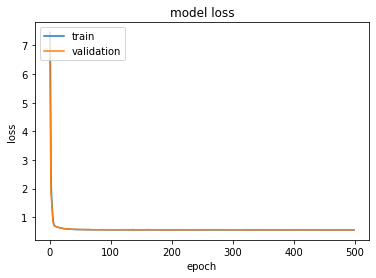

In [20]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

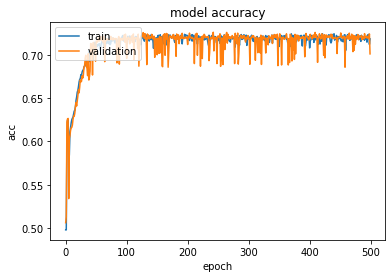

In [21]:
# "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
pred=model.predict(x1_test)

AUC: 0.778


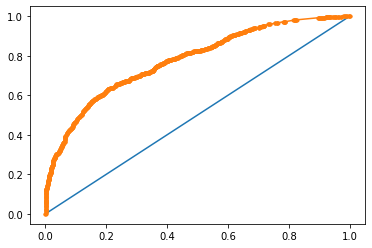

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

falsepos, truepos, thresholds = roc_curve(y1_test, pred)

auc = roc_auc_score(y1_test, pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y1_test, pred)
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(falsepos, truepos, marker='.')
plt.show()

In [22]:
h2data = pd.read_csv('H2.csv', dtype=dtypes)
a=h2data.head()
b=h2data
b

seconddata=b.apply(lambda col: pd.factorize(col, sort=True)[0])
seconddata

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,1,73,2,0,13,2,1,1,2,0,...,0,155,0,0,2,753,0,0,0,621
1,0,9,2,7,11,22,1,3,2,0,...,0,141,0,0,2,1784,0,1,1,653
2,0,39,0,1,32,9,1,1,2,0,...,0,1,0,0,3,122,0,0,1,62
3,0,4,2,3,6,16,1,2,2,0,...,0,73,0,0,0,192,0,0,1,618
4,1,222,1,5,27,5,1,4,2,0,...,0,155,0,0,0,606,0,1,0,184
5,1,30,0,11,39,29,0,2,2,0,...,1,83,0,0,2,1155,0,0,0,96
6,0,6,0,1,34,22,1,0,2,0,...,0,155,0,0,0,407,0,0,1,74
7,0,6,0,2,49,9,0,2,2,0,...,0,136,0,0,3,0,0,1,1,182
8,1,230,1,11,36,5,0,5,2,0,...,0,116,0,0,3,1376,0,0,0,277
9,0,65,0,10,40,7,0,3,2,0,...,0,70,0,0,2,260,0,0,1,121


In [23]:
leadtime = seconddata['LeadTime'] #1
staysweekendnights = seconddata['StaysInWeekendNights'] #2
staysweeknights = seconddata['StaysInWeekNights'] #3
adults = seconddata['Adults'] #4
children = seconddata['Children'] #5
babies = seconddata['Babies'] #6
meal = seconddata['Meal'] #7
country = seconddata['Country'] #8
marketsegment = seconddata['MarketSegment'] #9
distributionchannel = seconddata['DistributionChannel'] #10
isrepeatedguest = seconddata['IsRepeatedGuest'] #11
previouscancellations = seconddata['PreviousCancellations'] #12
previousbookingsnotcanceled = seconddata['PreviousBookingsNotCanceled'] #13
reservedroomtype = seconddata['ReservedRoomType'] #14
assignedroomtype = seconddata['AssignedRoomType'] #15
bookingchanges = seconddata['BookingChanges'] #16
deptype = seconddata['DepositType'] #17
agent = seconddata['Agent'] #18
company = seconddata['Company'] #19
dayswaitinglist = seconddata['DaysInWaitingList'] #20
custype = seconddata['CustomerType'] #21
adr = seconddata['ADR'] #22
rcps = seconddata['RequiredCarParkingSpaces'] #23
totalsqr = seconddata['TotalOfSpecialRequests'] #24
reserv = seconddata['ReservationStatus'] #25

In [24]:
a = np.column_stack((leadtime,country,deptype))
a = sm.add_constant(a, prepend=True)
IsCanceled = seconddata['IsCanceled']
b = IsCanceled
b=b.values

In [29]:
prh2 = model.predict(a)
prh2

array([[0.2547819 ],
       [0.26089573],
       [0.6979984 ],
       ...,
       [0.60992676],
       [0.76147115],
       [0.38535845]], dtype=float32)

AUC: 0.784


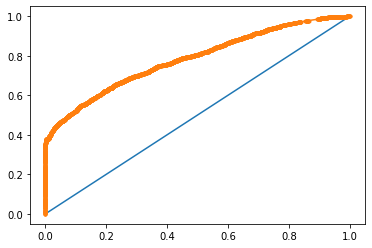

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

falsepos, truepos, thresholds = roc_curve(b, prh2)

auc = roc_auc_score(b, prh2)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(b, prh2)
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(falsepos, truepos, marker='.')
plt.show()